# <b>EDA 학습 과제 1</b>
## 스타벅스 이디야 매장 데이터 분석 과제

In [39]:
# requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic("matplotlib", "inline")
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

---
## 문제 1) 
### 서울시의 스타벅스 매장의 이름과 주소, 구 이름을 pandas data frame으로 정리해 두세요.
- 스타벅스 매장찾기(지역검색) URL : https://www.starbucks.co.kr/store/store_map.do?disp=locale

In [6]:
# selenium webdriver로 url 접근
from selenium import webdriver

url = 'https://www.starbucks.co.kr/store/store_map.do?disp=locale'
driver = webdriver.Chrome()

driver.get(url)

In [7]:
# "지역 검색" 태그 찾아서 클릭
from selenium.webdriver.common.by import By

search_region_tag = driver.find_element(By.CSS_SELECTOR, "#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a")

search_region_tag.click()

In [8]:
# 시/도 검색 태그에서 '서울' 찾아서 클릭
seoul_tag = driver.find_element(By.CSS_SELECTOR, "#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a")

seoul_tag.click()

In [9]:
# '전체' 태그 찾아서 클릭
gu_all_tag = driver.find_element(By.CSS_SELECTOR, "#mCSB_2_container > ul > li:nth-child(1) > a")

gu_all_tag.click()

In [10]:
# '전체' 태그 선택 결과를 BeautifulSoup를 활용하여 html로 파싱
from bs4 import BeautifulSoup as bs

# '전체' 태그 선택 결과화면의 html
html = driver.page_source
soup = bs(html, "html.parser")

print(soup.prettify())

<html lang="ko">
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
  <meta content="website" property="og:type"/>
  <meta content="Starbucks" property="og:title"/>
  <meta content="https://www.starbucks.co.kr/" property="og:url"/>
  <meta content="https://image.istarbucks.co.kr/common/img/kakaotalk.png" property="og:image"/>
  <meta content="Starbucks" property="og:description"/>
  <title id="titleJoin">
   Starbucks Korea
  </title>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-WC8Q3C59QP&amp;cx=c&amp;_slc=1" type="text/javascript">
  </script>
  <script async="" crossorigin="anonymous" src="https://connect.facebook.net/ko_KR/sdk.js?hash=aa5419f848df44b707639e26dc261560">
  </script>
  <script id="facebook-jssdk" src="//connect.facebook.net/ko_KR/sdk.js">
  </script>
  <script async="" src="//

In [11]:
# 위치별 스타벅스 매장 정보 호출하기 (li 태그 호출)
datas = soup.select("#mCSB_3_container > ul > li")

In [12]:
# 매장 이름, 주소, 구 이름 데이터 정리
from tqdm import tqdm

starbucks_list = []

for data in tqdm(datas) :
    each_data = {}

    cafe_name = data.select_one('strong').get_text().strip()
    cafe_address = data.select_one("p").get_text()[:-9]
    cafe_gu = cafe_address.split()[1]
    
    each_data = {'이름' : cafe_name,
                 '주소' : cafe_address,
                 '구' : cafe_gu}
    
    starbucks_list.append(each_data)

print(len(starbucks_list))

100%|██████████| 623/623 [00:00<00:00, 15152.16it/s]

623


In [13]:
# 데이터프레임 생성
starbucks_df = pd.DataFrame(starbucks_list)

starbucks_df.head()

,이름,주소,구
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구


In [14]:
starbucks_df.tail()

,이름,주소,구
618,사가정역,서울특별시 중랑구 면목로 310,중랑구
619,상봉역,서울특별시 중랑구 망우로 307 (상봉동),중랑구
620,묵동,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",중랑구
621,양원역,서울특별시 중랑구 양원역로10길 3 (망우동),중랑구
622,중화역,서울특별시 중랑구 봉화산로 35 1층,중랑구


In [15]:
# '서울' + 구 이름만 따로 저장해두기
seoul_gu = starbucks_df['구'].unique()

seoul_gu = ['서울 ' + gu for gu in seoul_gu]

seoul_gu, len(seoul_gu)

(['서울 강남구',
  '서울 강북구',
  '서울 강서구',
  '서울 관악구',
  '서울 광진구',
  '서울 금천구',
  '서울 노원구',
  '서울 도봉구',
  '서울 동작구',
  '서울 마포구',
  '서울 서대문구',
  '서울 서초구',
  '서울 성북구',
  '서울 송파구',
  '서울 양천구',
  '서울 영등포구',
  '서울 은평구',
  '서울 종로구',
  '서울 중구',
  '서울 강동구',
  '서울 구로구',
  '서울 동대문구',
  '서울 성동구',
  '서울 용산구',
  '서울 중랑구'],
 25)

In [16]:
# 스타벅스 창 닫기
driver.close()

---
## 문제 2) 
### 서울시의 이디야커피 매장의 이름과 주소, 구 이름을 pandas data frame으로 정리해 두세요.
- 이디야커피 매장찾기(지역검색) URL : https://www.ediya.com/contents/find_store.html

In [17]:
# selenium webdriver로 url 접근

driver = webdriver.Chrome()

driver.get('https://www.ediya.com/contents/find_store.html')

In [18]:
# '주소' 태그 찾아서 클릭
search_address_tag = driver.find_element(By.CSS_SELECTOR, "#contentWrap > div.contents > div > div.store_search_pop > ul > li:nth-child(2)")
search_address_tag.click()

In [19]:
input_gu = driver.find_element(By.CSS_SELECTOR, "#keyword")

In [20]:
# 검색창 태그 찾아서 seoul_gu 리스트 전달하고, 돋보기 태그 찾아서 클릭
# 돋보기 태그 클릭 결과 html을 beautifulsoup로 파싱
# 매장 이름, 주소, 구 저장
import time

ediya_list = []

for gu in tqdm(seoul_gu) :
    input_gu = driver.find_element(By.CSS_SELECTOR, "#keyword")
    input_gu.send_keys(gu)
    time.sleep(0.5)

    submit_btn = driver.find_element(By.CSS_SELECTOR, "#keyword_div > form > button")
    submit_btn.click()
    input_gu.clear()
    time.sleep(0.5)

    html = driver.page_source
    soup = bs(html, "html.parser")
    datas = soup.select("#placesList > li.item")

    for data in datas :
        each_data = {}

        cafe_info = data.select_one('a').get_text()
        cafe_name = cafe_info.split()[0]
        cafe_address = cafe_info[len(cafe_name):].strip()
        cafe_gu = cafe_address.split()[1]
    
        each_data = {
            '이름' : cafe_name,
            '주소' : cafe_address,
            '구' : cafe_gu
        }

        ediya_list.append(each_data)

100%|██████████| 25/25 [00:28<00:00,  1.14s/it]


In [21]:
# 데이터프레임 생성
ediya_df = pd.DataFrame(ediya_list)

ediya_df.head()

,이름,주소,구
0,강남YMCA점,서울 강남구 논현동,강남구
1,강남구청역아이티웨딩점,"서울 강남구 학동로 338 (논현동, 강남파라곤)",강남구
2,강남논현학동점,서울 강남구 논현로131길 28 (논현동),강남구
3,강남대치점,"서울 강남구 역삼로 415 (대치동, 성진빌딩)",강남구
4,강남도산점,서울 강남구 도산대로37길 20 (신사동),강남구


In [22]:
ediya_df.tail()

,이름,주소,구
552,중랑교차로점,서울 중랑구 동일로 683 (면목동),중랑구
553,중랑묵동점,서울 중랑구 공릉로 42 (묵동),중랑구
554,중랑역점,서울 중랑구 망우로 198 (상봉동),중랑구
555,중화동점,서울 중랑구 동일로129길 1 (중화동),중랑구
556,화랑대역점,"서울 중랑구 신내로25가길 2 (묵동, 현동학당)",중랑구


In [23]:
# 이디야커피 창 닫기
driver.close()

---
## 문제 3) 
### 문제 1과 2의 결과를 가지고 이제 이디야 커피는 스타벅스 커피 매장 근처에 있는지를 분석해보세요.

In [24]:
# google map api를 호출하여 각 매장별 위도, 경도값 가져오기
import googlemaps

gmaps_key = "<gmaps api key>"
gmaps = googlemaps.Client(gmaps_key)

starbucks_lat = []
starbucks_lng = []
ediya_lat = []
ediya_lng = []

# starbucks_df에 위도, 경도 컬럼 생성 후 값 저장
for idx, row in tqdm(starbucks_df.iterrows()) :
    tmp = gmaps.geocode(row['주소'], language='ko')
    if tmp :
        starbucks_lat.append(tmp[0].get('geometry')['location']['lat'])
        starbucks_lng.append(tmp[0].get('geometry')['location']['lng'])
    else :
        starbucks_lat.append(np.nan)
        starbucks_lng.append(np.nan)

starbucks_df['위도'] = starbucks_lat
starbucks_df['경도'] = starbucks_lng

# ediya_df에 위도, 경도 컬럼 생성 후 값 저장
for idx, row in tqdm(ediya_df.iterrows()) :
    tmp = gmaps.geocode(row['주소'], language='ko')
    if tmp :
        ediya_lat.append(tmp[0].get('geometry')['location']['lat'])
        ediya_lng.append(tmp[0].get('geometry')['location']['lng'])
    else :
        ediya_lat.append(np.nan)
        ediya_lng.append(np.nan)

ediya_df['위도'] = ediya_lat
ediya_df['경도'] = ediya_lng

623it [01:33,  6.69it/s]
557it [01:19,  6.98it/s]


In [25]:
# starbucks_df에 nan값이 있는지 확인
starbucks_df.isnull().sum()

이름    0
주소    0
구     0
위도    0
경도    0
dtype: int64

In [26]:
# ediya_df nan값이 있는지 확인
ediya_df.isnull().sum()

이름    0
주소    0
구     0
위도    0
경도    0
dtype: int64

In [52]:
# 스타벅스, 이디야 각 매장 위치 지도 시각화
import folium

m = folium.Map(location=[37.555213, 126.982990],
                zoom_start= 12,
                tiles="Cartodb Positron")

# 스타벅스 매장 마커
for idx, row in starbucks_df.iterrows() :
    folium.Marker(
        location=[row['위도'], row['경도']],
        icon=folium.Icon(
            color='green',
            icon='coffee',
            prefix='fa'
        )
    ).add_to(m)

# 이디야커피 매장 마커
for idx, row in ediya_df.iterrows() :
    folium.Marker(
        location=[row['위도'], row['경도']],
        icon=folium.Icon(
            color='blue',
            icon='coffee',
            prefix='fa'
        )
    ).add_to(m)

m

- 초록색 마커가 스타벅스, 파란색 마커가 이디야커피 매장이다.
- 매장 수가 많아 이렇게 보는건 큰 의미가 없는 것 같다.
- 인구 분포가 높은 강남구만 확인해보자.

In [54]:
# 강남구 매장 위치 지도 시각화

m = folium.Map(location=[37.500370, 127.061947],
                zoom_start= 14,
                tiles="Cartodb Positron")

# 스타벅스 매장 마커
for idx, row in starbucks_df.iterrows() :
    if row['구'] == '강남구' :
        folium.Marker(
            location=[row['위도'], row['경도']],
            icon=folium.Icon(
                color='green',
                icon='coffee',
                prefix='fa'
            )
        ).add_to(m)

# 이디야커피 매장 마커
for idx, row in ediya_df.iterrows() :
    if row['구'] == '강남구' :
        folium.Marker(
            location=[row['위도'], row['경도']],
            icon=folium.Icon(
                color='blue',
                icon='coffee',
                prefix='fa'
            )
        ).add_to(m)

m

- 위치가 가까워 보이긴 하지만 강남구가 넓지 않아 인접해보일 수도 있을 것 같다.
- 서울시 구 중에서 면적이 가장 넓은 서초구를 시각화해보자.

In [55]:
# 서초구 매장 위치 지도 시각화

m = folium.Map(location=[37.476608, 127.030729],
                zoom_start= 14,
                tiles="Cartodb Positron")

# 스타벅스 매장 마커
for idx, row in starbucks_df.iterrows() :
    if row['구'] == '서초구' :
        folium.Marker(
            location=[row['위도'], row['경도']],
            icon=folium.Icon(
                color='green',
                icon='coffee',
                prefix='fa'
            )
        ).add_to(m)

# 이디야커피 매장 마커
for idx, row in ediya_df.iterrows() :
    if row['구'] == '서초구' :
        folium.Marker(
            location=[row['위도'], row['경도']],
            icon=folium.Icon(
                color='blue',
                icon='coffee',
                prefix='fa'
            )
        ).add_to(m)

m

- 서초구 북부쪽 중앙 부분에는 많이 인접해 있지만, 테헤란로와 인접해 있는 구역은 스타벅스 매장밖에 입점하지 않았다.
- 또한 남부쪽에는 적은 수이지만 스타벅스 매장이 없는 곳에 이디야커피 매장 몇 개가 입점해 있는 것을 확인할 수 있었다.
- 서초구 역시 인구 분포가 높은 곳이니 이번에는 스타벅스 매장이 가장 적은 구를 시각화하여 분석해보자.

In [30]:
# 스타벅스 매장 수가 가장 적은 구 확인
starbucks_df['구'].value_counts(ascending=True)

구
강북구      7
도봉구      7
중랑구      8
동작구     11
관악구     12
동대문구    13
성동구     14
은평구     14
금천구     15
노원구     15
구로구     15
성북구     16
양천구     17
강동구     18
광진구     19
서대문구    21
용산구     24
강서구     28
송파구     37
마포구     37
종로구     39
영등포구    41
서초구     50
중구      52
강남구     93
Name: count, dtype: int64

- 스타벅스 매장 수가 가장 적은 강북구의 스타벅스, 이디야커피 매장 위치를 지도에 시각화해보자

In [56]:
# 강북구 매장 위치 지도 시각화

m = folium.Map(location=[37.648111, 127.011262],
                zoom_start= 14,
                tiles="Cartodb Positron")

# 스타벅스 매장 마커
for idx, row in starbucks_df.iterrows() :
    if row['구'] == '강북구' :
        folium.Marker(
            location=[row['위도'], row['경도']],
            icon=folium.Icon(
                color='green',
                icon='coffee',
                prefix='fa'
            )
        ).add_to(m)

# 이디야커피 매장 마커
for idx, row in ediya_df.iterrows() :
    if row['구'] == '강북구' :
        folium.Marker(
            location=[row['위도'], row['경도']],
            icon=folium.Icon(
                color='blue',
                icon='coffee',
                prefix='fa'
            )
        ).add_to(m)

m

- 강북구는 이디야커피 매장 수가 스타벅스 매장 수보다 많은 것을 확인했다.
- 이로써 이디야커피는 스타벅스 매장 근처에 위치하지 않는다는 결론에 조금 더 가까워졌다.
- 마지막으로 서울시 각 구별 스타벅스, 이디야커피 매장 수를 그래프로 확인해보겠다.

In [32]:
# 하나의 그래프로 시각화하기 위해 두 데이터프레임 합치기
starbucks_df['브랜드'] = 'starbucks'
ediya_df['브랜드'] = 'ediya'

total_df = pd.concat([starbucks_df, ediya_df])

total_df

,이름,주소,구,위도,경도,브랜드
0,역삼아레나빌딩,서울특별시 강남구 언주로 425 (역삼동),강남구,37.500078,127.038542,starbucks
1,논현역사거리,서울특별시 강남구 강남대로 538 (논현동),강남구,37.513679,127.031712,starbucks
2,신사역성일빌딩,서울특별시 강남구 강남대로 584 (논현동),강남구,37.513679,127.031712,starbucks
3,국기원사거리,서울특별시 강남구 테헤란로 125 (역삼동),강남구,37.499615,127.031676,starbucks
4,대치재경빌딩,서울특별시 강남구 남부순환로 2947 (대치동),강남구,37.494525,127.062584,starbucks
...,...,...,...,...,...,...
552,중랑교차로점,서울 중랑구 동일로 683 (면목동),중랑구,37.591448,127.079882,ediya
553,중랑묵동점,서울 중랑구 공릉로 42 (묵동),중랑구,37.614411,127.078301,ediya
554,중랑역점,서울 중랑구 망우로 198 (상봉동),중랑구,37.593285,127.074889,ediya
555,중화동점,서울 중랑구 동일로129길 1 (중화동),중랑구,37.601957,127.086627,ediya


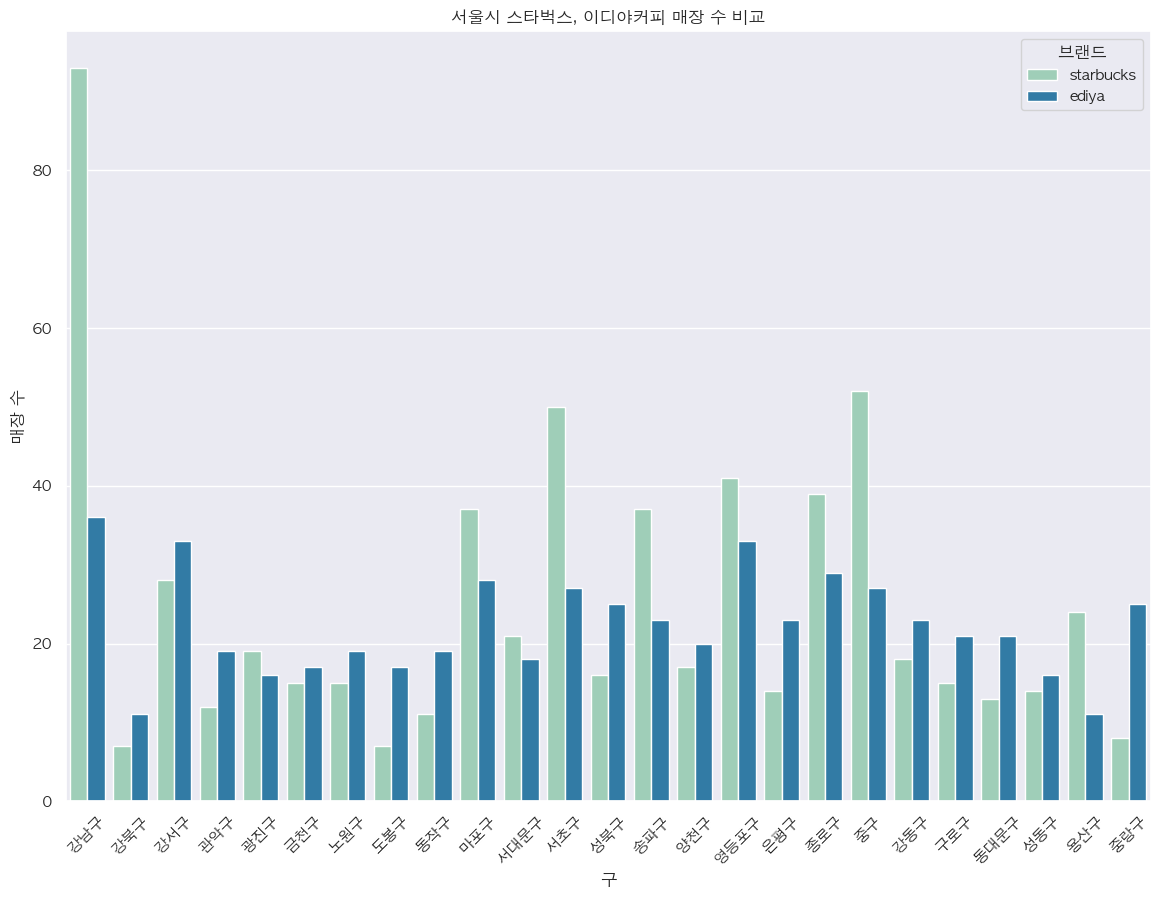

In [47]:
# bar 그래프로 두 매장 수 비교

plt.figure(figsize=(14, 10))
sns.set_theme(font="AppleGothic",   # requirements셀에 한글깨짐 방지 코드를 실행하였으나 여전히 한글이 깨져, seaborn theme에 직접 지정
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax=sns.countplot(x="구", hue='브랜드', data=total_df, palette='YlGnBu')
ax.set(title='서울시 스타벅스, 이디야커피 매장 수 비교')
ax.set_ylabel("매장 수")
_, xlabels = plt.xticks(rotation=45)
plt.show()


- 스타벅스는 강남구, 서초구, 중구 등 특정 지역에 많이 밀집되어 있고, 이디야커피는 전체 구에 고루 입점되어 있다.

## 결론
- <b>이디야커피는 스타벅스 매장 근처에 위치하지 않는다.</b> 
- 지도 시각화를 통해 인구 밀집도가 높은 구에서 서로 인접해있는 매장도 많이 보였지만, 실제로 스타벅스 매장 주변에 이디야커피 매장이 없는 경우도 많았으며, 스타벅스 매장 수가 가장 적은 구에서는 오히려 이디야 커피 매장 수가 더 많이 입점되어 있음을 확인하였다. 
- 또한 이디야커피가 스타벅스 매장 근처에 입점한다고 가정한다면 스타벅스 매장 수가 현저히 많은 구(강남구, 서초구, 중구)에 입점한 이디야커피 수도 다른 구에 비해 현저히 많아야 하지만, 막대 그래프를 확인했을 때 이디야커피는 서울시의 모든 구에서 스타벅스에 비해 균일하게 분포되어 있음을 확인하였다.